# Statistical thinking in a nutshell

## A mock statistical problem: flipping a thumb tack/drawing pin

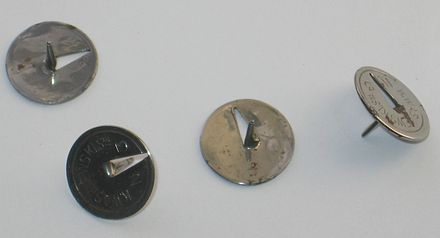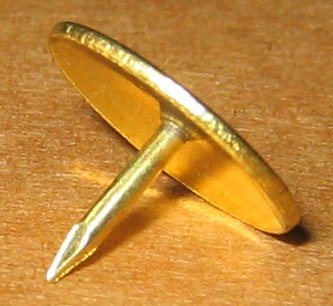

Everybody  "knows" that, if we flip a "fair" coin, the probability  for it to land standing on each one of the two flat sides is equal and the probability for it to land on the rim is negligible. Hence, the probability of each side is 1/2.

What is the meaning of the three undefined statements  in this sentence?

1. fair coin
2. flip
3. probability

Clearly these meanings are connected.

Let us start with "flipping a coin". There is nothing inherently stochastic in this.

It is possible to build a machine which tosses the coin, even a clearly unbalanced coin, in such a way that it (almost) always falls on the same side (see this link for a fun and interesting  discussion https://www.cheenta.com/physics-of-coin-tossing-and-uncertainty-cheenta-probability-series/.

Stage magicians can do so with their hands: the trick is to have a flat spin, a good control on the force of the thumb and a good sense of rythm in catching the coin at the right  moment.\
This is easier if the coin is bigger and heavier, say, an old silver dollar.\
Alternatively, but this is a little bit of cheating, you learn to feel the sides whith your fingers when you catch the coin and choose which side to present.\
Hence, we should add "fair" or "clumsy" to the word "spin".\
Then: define clumsy :).\
The "fair" in "fair coin" is a little bit more objective. We may connect  this to the centre of gravity of the coin, its shape, how coarse are the sides and so on.\
However, it is clear that, the fairer the coin,the easier to control its flipping, if we want this.
For a fair coin we need a fair spin.\

But the most misunderstood  word is "*probability*". Notice that you use this word as an attribute of a single flip of the coin. And in the result of a single flip there is nothing worth 1/2.\
The word "**worth**" is going to be relevant.

The standard interpretation is: if you (clumsy) flip a (reasonably) fair (in some physical sense) coin "many" times "under the same conditions", you expect to see "about" one half of the time one side up. This would require to flip the coin a great number of times  to "know" the probability, moreover, not only this is quite difficult: if the number of flips is finite, however big, the frequency continues to change.

Hence, to avoid a statement that not only depends on the (unknown) result of $n$ coin flips you should do, but also depends on $n$ you are bound to take the train of metaphysics and speak of "*limit frequency*".\
This means that the probability is always unknown and unknowable. Surely, if this is the interpretation, with all the shaky quotation marks, we should wonder what use has this at all and, in particular, what use if we just flip the coin once. It may be considered as an a priori statement of faith about the honesty of the referee flipping the coin, surely not about the result. Again, it certainly is not a property of the coin, or of the tossed coin, as, once flipped, it stands on a face. No 1/2. No more probability.

There is a second interpretation.

How much would you pay for entering a bet on the result on this coin flip which gives you 1, if your choosen side is up and 0 otherwise? Probably, many of you whould pay 1/2 for this bet. Why? Maybe because you believe in symmetry (of the coin) and chaos (of the flipping) or maybe because you have direct or indirect experience of past results of setups you judge similar and you think betting the (past) frequency is reasonable.\
Under some assumptions which avoid arbitrages ("dutch books"), and if you suppose money has a linear utility, prices of bets of this kind exactly behave, in formal terms, like probabilities.

The two ideas of probability are not incompatible, the reason is that the first idea (**frequency definition**) if taken to the limit, is totally metaphysical, as you cannot know limit frequencies, hence, it is compatible with any "empirical estimate" of probability and the empirical estimates used by who believes that probability is the limit of frequency, and those used by those who say that probability is a bet price, in order to decide how much to bet, shall be very similar.

A simple example of this.

It is possible to prove that, if  the  probability, limit frequency or betting price, no problem which, of observing $k$ heads and $n-k$ tails out of any $n$ flips of the coin whatever $n$ only depends on $n$ and $k$ and not on the order of the results (this hp is called "Exchangeability"), then the random variable $k/n$, the frequency of heads, converges with probability 1 to $P(Head)$.\
This last sentence, if you intend probability as a betting price, means that you would bet 1 on the fact that $k/n$ converges to $P(Head)$ where $P(Head)$ is what you bet on head (which, by hypothesis, is the same value whatever the place of the flip you bet on, in the series of flips).



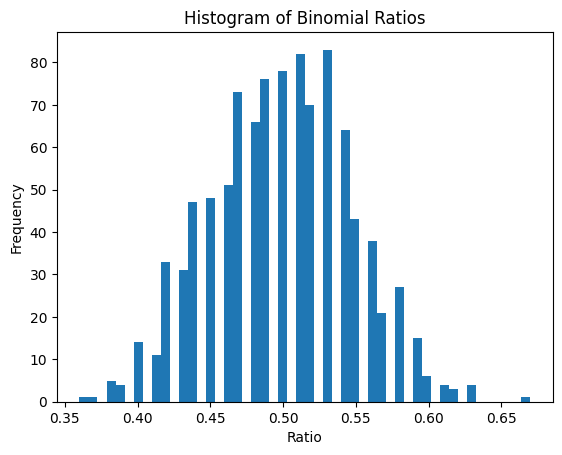

Mean: 0.49873 should be 0.5
Std: 0.048175586140699944 should be 0.05


In [1]:
#here we generate 1000 binomial random numbers with n=100 and theta=.5
#we then compute the frequencies divide each result by n
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate 1000 binomial random numbers
n = 100         # Number of binomial samples
theta = 0.5     # Probability of success
N=1000          # Number of observations
binomial_numbers = np.random.binomial(n, theta, N)

# Divide each result by n
ratios = binomial_numbers / n   # It is the relative frequency

# Plot the histogram of the ratios
plt.hist(ratios, bins=50)       # Sampling distribution
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Binomial Ratios')
plt.show()

# Compute the mean and std the ratios
mean = np.mean(ratios) # Should be close to theta
std = np.std(ratios)   # Should be close to sqrt(theta*(1-theta)/n)

print("Mean:", mean, "should be", theta)
print("Std:", std, "should be", np.sqrt(theta*(1-theta)/n))
# this we need at the end of the lecture
ratios=pd.DataFrame(ratios)
ratios.columns=["flip"]

The mean of the distribution should the closest to $\theta$, while the *std* is found through:
$$\sqrt{n \cdot {\theta\cdot(1-\theta)}}$$

### Now, tacks


Coin tossing, however, is not a good example. This because we have fixed in mind that the probability of Head and Tail should be 1/2. We have seen that this is a dangerous idea, but, still...\
Here enter tacks.

Tacks are like coins, if you flip them, and let them fall on a hard surface, they have two possible states: point up or  slanted "fallen umbrella" (see the above pictures).
However, nobody would "know" that the probability, whatever the definition, of each of the two states is 1/2, or any other given specific number.
We may have some idea that the longer the pin wrt the width of the head the bigger the probability of the slanted state.
Moreover, the heavier the pin wrt the head, the less likely, arguably, the head down state.
However, clearly, the physics of an average pin is more complex than that of an average coin, and we cannot recur to the idea of "fair" pin/"fair" flip + symmetries to say we "know" that the probability of each state is 1/2.\
Still, we must bet on or, if you like, still we want to know something about the limiting frequency of the states.

Here, really, enters statistics.

One way to proceed would be to use the result hinted above and try to compute:
$$P(X_{n+1}=1|\sum_{i=1}^nX_i=k)$$
where $X_i=1$ if the result of the ith flip is slanted and 0 otherwise.

We can show that, under [exchangeability](https://en.wikipedia.org/wiki/Exchangeable_random_variables):
$$P(X_{n+1}=1|\sum_{i=1}^nX_i=k)=\frac{\alpha+k}{\alpha+\beta+n}$$
where $\{\alpha,\beta\}$ are two positive numbers which may be chosen to represent information or beliefs one may have on the probability of $X_{n+1}=1$ apart from the info in the sample.

This rule, with the choice $\alpha=\beta=1$ was discovered by Thomas Bayes around 1750 and made popular by Laplace at the beginning of 19th century. It concides to a prior which is uniform, no knowledge about $\theta$, that means that every interval of the same lenght between $0$ and $1$ have the same probability to contain $\theta$.


You may better understand the role of $\alpha$ and $\beta$ if you write the prediction formula for $n=0$:
$$P(X_{1}=1)=\frac{\alpha}{\alpha+\beta}$$
In words: $\frac{\alpha}{\alpha+\beta}$ is the **expected value** of the result of a flipping (the probability of $X_{i}=1$) when you do not have data.

**🔍 Notice something interesting:**  

You can get the same ratio $\frac{\alpha}{\alpha+\beta}$ with completely different size of the denominator and numerator. However, the smaller $\alpha + \beta$ the less relevant are these a priori as the conditional probability quickly becomes equal to the observed frequency, even for moderate $n$.
\
In any case, with $n\to\infty$, only the observed frequency counts.

---

If you are not used to this kind of statistical thinking (the Bayesian way), what follows may sound more familiar.

Let $\{X_i\}$ be i.i.d. *conditional on $\theta$* with $P(X_i=1|\theta)=\theta$.

>**Note!** i.i.d. implies exchangeability, but not vice versa.
In fact, independence is a very particular case.

Suppose you compute:
$$P(X_{n+1}=1|\sum_{i=1}^nX_i=k,\theta)$$
by independence we have:
$$P(X_{n+1}=1|\sum_{i=1}^nX_i=k,\theta)=P(X_{n+1}=1|\theta)=\theta$$
and we are in a strange situation because, due to conditional independence given $\theta$ (we don't need to know the past Xs), <u>past observations tell us about the probability</u>, *given $\theta$* of a new one.\
The one above is the **predictive distribution** made by classical statisicians.

This is totally reasonable, if we really knew $\theta$. However, **we do not know $\theta$!**
\
What is then the meaning of assuming independence conditional on an unknown $\theta$ and how can we make forecasts, how can we use data?
\
This is the standard setup used in Statistics 101 (but, probably, your teacher did not comment on this). The standard interpretation is that "Nature" sets the "true" value of $\theta$ and the purpose of statistical inference is to discover it.

Rivers of ink were poured defending and contesting this "objective probability" idea, people leaning toward limit frequency interpretation of probability, tend to accept it. Subjectivists, which are usual Bayesians, shall tell you this is meaningless.

However, does this implies different practical decisions?

At least in this setup, not really.

We already did see what Bayesians would do:
1. Assume exchangeability unconditional to any non observable parameter
2. If you have any prior, express it by choosing $\alpha$ and $\beta$.
3. Then, conditional to $n$ observations, the probability fron $X_{n+1}=1$ is: $$P(X_{n+1}=1|\sum_{i=1}^nX_i=k)=\frac{\alpha+k}{\alpha+\beta+n}$$

Now, let us consider the standard approach you were taught to follow.

1. **From conditional independence to likelihood**. The joint probability for a sample $[X_1,...,X_n]$  is:
$$P(X_1=x_1,...,X_n=x_n|\theta)=\theta^{\sum_{i=1}^nx_i}(1-\theta)^{n-\sum_{i=1}^nx_i}$$
Once the sample is observed and the $\{x_i\}$ are 0s or 1s, this is just a function of $\theta$ and we call it "**Likelihood**".

2. **Maximum likelihood**. For any given sample, the Likelihood  is *maximized* if:
$$\hat{\theta}_n=\frac{\sum_{i=1}^nx_i}{n}$$
With **$\hat{\theta}$** called the *estimator* of $\theta$.

3. Your "**maximum Likelihood**" estimate of $\theta$ is then:
$$\hat{\theta}_n=\frac{\sum_{i=1}^nx_i}{n}$$
4. **Estimated forecast**. To make a forecast, you need to estimate $$E(X_{n+1}|\theta)=P(X_{n+1}=1|\theta)=\theta$$
Your estimate shall be:
$$P(X_{n+1}|\hat{\theta})=\hat{\theta}=\frac{\sum_{i=1}^n x_i}{n}$$
Which is (almost) exactly the result we got in the bayesian way, if $n$ is not too small or $\alpha+\beta$ very big.
\
This is the classic "maximum likelihood" approach suggested by Fisher in the nineteen twenties.

An older method of "classical" inference, the **method of moments**, gives in this case the same answer.

1. We know that
$$E(X_i|\theta)=\theta$$
and we "know" that a good estimate of the expected value of a random variable, in case of iid sampling, is the *average* of the observed value.

2. We then set
$$\hat{\theta}_n=\frac{\sum_{i=1}^nx_i}{n}$$
put this in $E(X_{n+1}|\theta)$ and get the same result.

We have found three ways for what is basically the same result:
\
If you want to bet on the next flip, of WHATEVER has two possible states, to result in state labeled 1.
\
If you believe the process of flipping exchangeable, or  even independent conditional on $\theta$, and you have enough data on previous results and not too strong a priori.
\
Then bet the **relative frequency**.

In this sense, back to the tack and the coin, the real difference, we understand now, is that you probably have some strong a priori (this is the meaning of "you know") on the coin probability, less on the tack.

The a priori may be so strong you do not even use data.
\
This is, probably, never a good choice.



### Appunti Lezione
![image-2.png](attachment:image-2.png)

Bayes Theorem: the predictive distribution, aka the forecast. The more data we have, the more it will concide to the classical predictive distribution.

![image.png](attachment:image.png)

### Sampling variability

Maybe, now, we understand a little better the connection of probability with frequency, betting prices, and estimation with maximum likelihood and method of moments.

The statistics idea goes on from this point.

The first question asked by any statistician is:

>*"Ok, now we have an estimator. It is a random variable whose value depends on the sample results. How much can it change from sample to sample?"*

This question, in different versions, is meaningful for both classical and bayesian statisticians (although some anarco-bayesians disagree).
\
The classical version of the question is the one you are used to and I shall concentrate on this:

>*"What is the distribution of the estimator of $\theta$ determined by the random nature of the sample"?*

This question leads to the study of **sampling variability** and is a central point of Statistics.

Obviously, the answer to this question, under the "frequency" idea of probability, is relevant if we intend to compute our estimator on many independent samples.
\
Otherwise, while we can answer to the question with some maths dealing with hypothetical samples, the answer shall not be very useful.

If, as often is the case with ML, we expect to have a single sample, or few samples, maybe very big, the question loses some relevance.

If **we know** the sampling distribution of the estimator, we can at least know how much is likely, under repeated sampling, to observe "reasonable values" of the estimator itself.

Let us go back to the flipping (of anything) example, under the iid conditional on $\theta$ hypothesis.

Let $S_n=\sum_{i=1}^n X_i$ under our hypotheses we have
$$S_n|\theta \sim Bi(n,\theta)$$

That means that it is distributed as a **Binomial**, if we have $Bi(10, 0.5)$, we have the expected number of heads in 10 flips. So $n$ is the the *number of trials*, $\theta$ is the *probability*.

In formulas, this is
$$P(S_n=k|\theta)={n \choose k}\theta^{k}(1-\theta)^{n-k}$$
This "sampling distribution" (probability of k successes given $\theta$) of $S_n$ is a **binomial distribution**, it has *expected value* $$n\theta$$ and *variance* $$n \cdot {\theta\cdot(1-\theta)}$$

Since our estimator is just $$\hat{\theta}_n=\frac{S_n}{n}$$ this result tells us whatever we may wish to know of its sampling variability because it allows us to compute the sampling distribution of the estimator.
$$P(\hat{\theta}_n=k/n|\theta)={n \choose k}\theta^{k}(1-\theta)^{n-k}$$


For instance: the expected value of our estimator (conditional on $\theta$) shall be
$$E(\hat{\theta}_n|\theta)= \frac{n\theta}{n}=\theta$$

This is **true** whatever the value of $\theta$. This is a good thing and we gave it a "nice name": "**unbiasedness**".

The variance of the estimator shall be
$$V(\hat{\theta}_n|\theta)=\frac{V(S_n|\theta)}{n^2}=\frac{\theta(1-\theta)}{n}$$

So, for instance, the maximum sampling variance of the estimator (the maximum possible variance computed using the sampling distribution of the estimator) shall be $\frac{.25}{n}$ and, using Tchebicev inequality, we shall be able to say that the probability of observing a sample which gives us a value outside the interval
$$\theta\pm \frac{1}{\sqrt{n}}$$
is less than .25.

With $n=1000$ this interval becomes, approximately
$$\theta\pm .032$$
with 2000 observations .022.

Moreover, the CLT allows us to say that, if $n$ is big enough (30 to 50 obs are enough), the interval
$$\theta \pm 1.96 \sqrt{\frac{\theta(1-\theta)}{n}}$$
contains **95%** of the probability in the distribution of $\hat{\theta}_n$.

For $n$ slightly bigger, the same statement holds for
$$\theta \pm 1.96 \sqrt{\frac{\hat{\theta}_n(1-\hat{\theta}_n)}{n}}$$

In any case, with big enough $n$, we can expect with high probability (means "betting on it is pricey") to observe an estimate **not to far** from the limit (with probability one) value of the relative frequency.

Now, given a sample, can we say how far or how near from this is the value we actually observed?
\
Sorry, no, it is just a value, a sample, but we may find some justification in knowing that, the random variable (estimator) of which my estimate is an observed value should produce data near the limit value.
\
This "some justification" is expressed, in classical Statistics, by the idea of "**confidence intervals**" for $\theta$.

For example, inverting the probability interval based on the CLT, we have that
$$P\left(\theta \in \left[\hat{\theta}_n \pm 1.96 \sqrt{\frac{\theta(1-\theta)}{n}}\right]|\theta\right)=.95$$

Once the sample is observed, the interval either does or does not cover $\theta$, and, not knowing $\theta$, we do not know about this.

However, the interval we observe is one of a potential infinite sequence which should cover $\theta$ with a limiting frequency of .95.
\
We express this, together with the basence of probability, by using the term "*confidence interval with .95 confidence*".

There exist less "verbal" and more substantial justification of the above interval in the bayesian setting but these are not matter for this course.

### Hypothesis testing

We can see the sampling variability problem in a slightly different way.

We have 1000 observations from tack flipping and the frequency of  state 1 (slanted) is .7. Is this enough to act as if we knew that $\theta>.5$?

Let us reason with what we know:

1. if $\theta=.5$ then we have at least 75% probability of observing a frequency in the interval $.5\pm .032$.
2. we observe .7 and this is not in the 75% probability interval centered in $\theta=.5$
3. sure, it is possible that my observation is compatible with $\theta=.5$ but, if this is the case, it did appear in an unlikely interval
4. this may lead me to reject the hypothesis $\theta=.5$. This does not mean that the hypothesis is false. It means that I observed unlikely data under this hypothesis.

Tchebicev is very powerful but very coarse, so, back to CLT.

>The [CLT](https://www.geeksforgeeks.org/central-limit-theorem/#central-limit-theorem-formula) tells us that, under the hypotheses we work on, the distribution of $S_n$ which is a binomial, can be approximated, for $n$ big enough, by a Gaussian with expected value $n\theta$ and variance $n\theta(1-\theta)$.

This implies that the distribution of $S_n/n$ can be approximated with that of a Gaussian with expected value $\theta$ and variance $\frac{\theta(1-\theta)}{n}$.

From this we can deduce that, conditional to $\theta=.5$ and $n=1000$, the probability of observing
$$S_n/n>.5+1.96\frac{.5}{\sqrt{1000}}=.5+.157$$
is 2.5%.

Hence, with this approximation, we can say that the .7 we did observe is in an interval of values that has, before sampling, a very small probability to contain observations if $\theta=.5$.

It seems not unreasonable, in these circumstances, to act as if the hypothesis $\theta=.5$ was false. Solo per il 2.5% di probabilità si ha che effettivamente $\theta$ fosse .5.

This is, in a nutshell, the reasoning in testing statistical hypothesis.

### Conclusions

In this simple discussion we tried to clarify, with one example
1. what do we mean with the sentence "the probability is"
2. how do we estimate a parameter in a specific hypothetical setting
3. how we evaluate sampling variability
4. how we use this to test statistical hypotheses

This is just an example, in a very simple setting

Consider it in detail and with calm. Does anything sounds new and/or different wrt you know?




# Binomial simulations with random probability
## Exchangeable random variables

How can we simulate the case when we flip a tack?

In this case probability is unknown, how we proceed?

A possible way is to suppose that, for each simulation, $\theta$ is drawn from a distribution with support in $[0,1]$.
\
By manipulating the parameters of this distribution, we can express our "a priori" on the values of $\theta$.

A good choice for such distribution is the [$Beta(\alpha,\beta)$](https://en.wikipedia.org/wiki/Beta_distribution) distribution. In probability theory and statistics, the beta distribution is a family of continuous probability distributions defined on the interval [0, 1] or (0, 1) in terms of two positive parameters, denoted by alpha ($\alpha$) and beta ($\beta$), that appear as exponents of the variable and its complement to 1, respectively, and control the shape of the distribution.\
This is the distribution of a **real random variable $X$** with values between 0 and 1. $\alpha$ and $\beta$ are positive parameters and:
$$E[X] = \frac{\alpha}{\alpha+\beta}$$
$$V[X] =  \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$$

If $\alpha=\beta=1$ we have $$Beta(1,1)=Uniform(0,1)$$

Hence, if we are "ignorant" about $\theta$ we can use this case ([uniform distribution]((https://www.geeksforgeeks.org/uniform-distribution-formula/))) as a reference.

With $\alpha>1$ and $\beta>1$ the distribution is **unimodal**.
\
If $\alpha<1$ and $\beta<1$ the distribution is **U shaped**.
\
If $\alpha=\beta$ the distribution is *symmetric*.

>The bigger $\alpha+\beta$ the smaller the variance of the distribution and all probability is concentrated around the expected value.

As you can see, this distribution may represent many different "ideas" on $\theta$.

                 0
count  1000.000000
mean      0.481860
std       0.294186
min       0.000000
25%       0.210000
50%       0.490000
75%       0.740000
max       1.000000


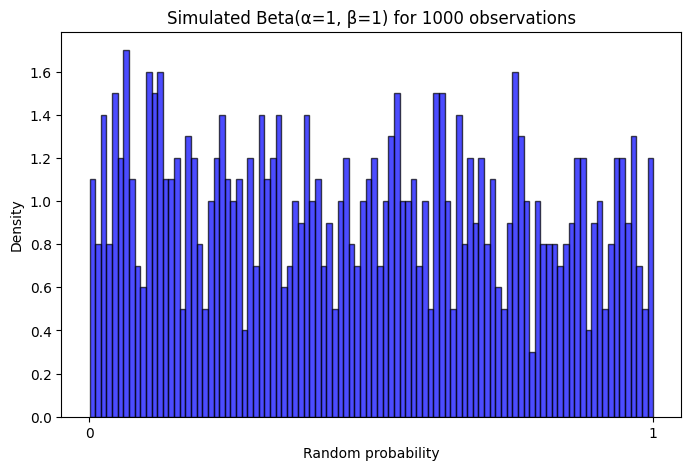

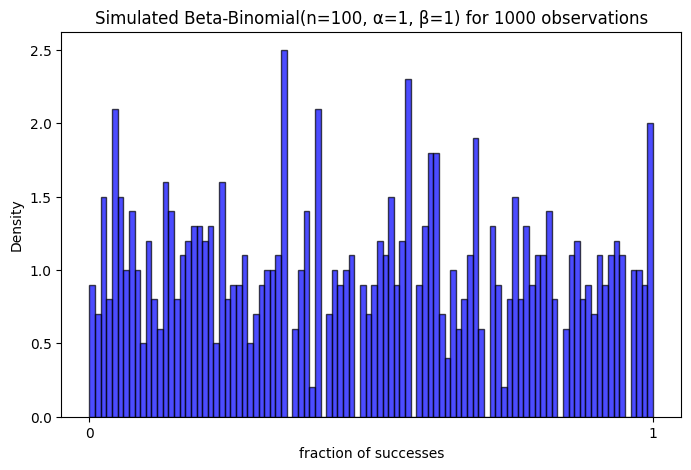

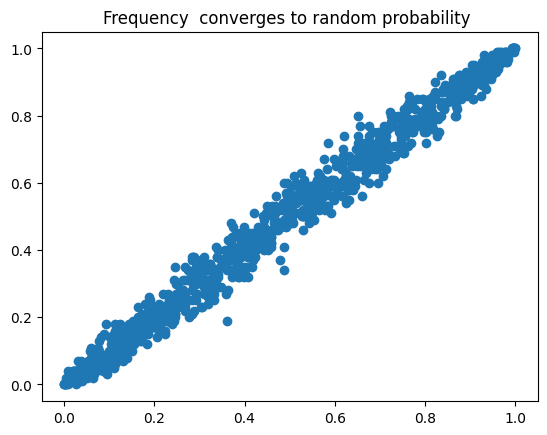

average frequencies 0.48186
std frequencies 0.29403935178815777
correlation of exchangeable  beta binomial draws 0.3333333333333333


In [2]:
import numpy as np
from scipy.stats import beta, binom
import matplotlib.pyplot as plt


def simulate_beta_binomial(N, n, alpha, beta_param):
    p_samples = beta.rvs(alpha, beta_param, size=N)
    binomial_samples = binom.rvs(n, p_samples)
    return binomial_samples,p_samples

# Set parameters
N, n, alpha, beta_param = 1000, 100, 1, 1

# Simulate data
[simulated_data,simulated_beta] = simulate_beta_binomial(N, n, alpha, beta_param)
simulated_frequencies=simulated_data/n
print(pd.DataFrame(simulated_frequencies).describe())


# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(simulated_beta, bins=100, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel("Random probability")
plt.ylabel("Density")
plt.title(f"Simulated Beta(α={alpha}, β={beta_param}) for {N} observations")
plt.xticks(range(2))
plt.show()


# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(simulated_data/n, bins=100, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel("fraction of successes")
plt.ylabel("Density")
plt.title(f"Simulated Beta-Binomial(n={n}, α={alpha}, β={beta_param}) for {N} observations")
plt.xticks(range(2))
plt.show()



plt.scatter(simulated_beta,simulated_data/n)
plt.title("Frequency  converges to random probability ")
plt.show()
print("average frequencies",simulated_frequencies.mean())
print("std frequencies",simulated_frequencies.std())
print('correlation of exchangeable  beta binomial draws',1/((alpha+beta_param+1)))


# The Deep learning Approach
Both frequency and bayesians statisticians, shall use observed frequency to forecast future frequencies.
\
This, as we did see, comes from a model (very simple) and from mathematical deduction on this model.
\
We also did see, by simulating data, that this "works" if we generate data according to the model (both in the exchangeable and in the independent given $\theta$ case).

We would be very surprised if this should not happen!

ML **does not** follow this path. There is no "model". Also no probability in principle.
\
Data is offered to a very complex parametric structure in the form of lots of "*training samples*", and parameters are trained to minimize some loss function.

The LLM time series model **Chronos** is trained on about 190.000 time series. The series are used to generate a much bigger sample by a procedure called "augmentation" that, basically, uses each series in the DB to generate other series by several processes (contamination, resampling etc). The model is trained on this augmented DB.
\
The structure of the model is based on T5 which is a LL encoder-decoder model similar to the one at the basis of GPT2. The model has several version with parametrizations from 16M to 11B parameters. Here we run the 48M parameter version.

Sampling variability is dealt with by applying the trained model to an holdout sample and comparing the loss function performance with the results on the training sample.
\
A new dataset is then offered to the trained model and the corresponding "forecast" is computed. No attempt to confidence intervals or similar.

The model treats time series as strings of symbols to be tokenized. as in any languege model, the forecast is given by the tokens that "most likely" follow the observed token series. Loss function is cross-entropy.
\
See the [paper](https://arxiv.org/pdf/2403.07815) for the details.

In the following example  we use this pre-trained forecasting LLM in order to forecast the next 50 observations after 950 binomial samples, each with $n=100$, "generated" supposing $\theta=.5$.
\
We already know that classical and bayesian forecasts should be based on an *estimated binomial* with $n=100$ and $\hat{\theta}_n$ which is about .5. This should be our forecasting distribution for all 50 future observation.
\
The model produces the 10%, 50%, 90% quantiles of the predictive distribution. We "know" that these should be the same for all forecasted observations and should be about .44, .50, .56.

However, the LLM has **no idea** about this.

We do not expect ability in forecasting but, at least, we expect about the same statistics, similar to the statistical based ones, for the forecasting distributions at each of the 50 forecasting steps.
\
Let us see what happens applying a model with 48 millions of parameters.
\
We begin by installing the pretrained model.

In [3]:
%pip install chronos-forecasting
#https://github.com/amazon-science/chronos-forecasting
#paper in https://arxiv.org/pdf/2403.07815

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

We then pass to the model the first 950 observations in coin flipping simulated dataset we created in the first program cell of this lecture, and ask for forecasting 50 observations.

In [4]:
%pip install torch
import pandas as pd  # requires: pip install pandas
import torch as torch
from chronos import BaseChronosPipeline

pipeline = BaseChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",  # use "amazon/chronos-bolt-small" for the corresponding Chronos-Bolt model
    device_map="cpu",  # use "cpu" for CPU inference use "cuda" for GPU
    torch_dtype=torch.bfloat16,
)

# "ratios" are the results of the binomial simulation at the beginning of the lecture
df = ratios
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
# quantiles is an fp32 tensor with shape [batch_size, prediction_length, num_quantile_levels]
# mean is an fp32 tensor with shape [batch_size, prediction_length]
quantiles, mean = pipeline.predict_quantiles(
    context=torch.tensor(df['flip'].iloc[:950]),
    prediction_length=50,
    quantile_levels=[0.1, 0.5, 0.9],
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/185M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

Let us compute some descriptive statistics of the input sample and of the quantiles of the 50 forecast distributions.

In [5]:
median=quantiles[0,:,:]

true=df['flip'].iloc[:950]
forecasted=pd.DataFrame(median.numpy())
print(true.describe())
print(forecasted.describe())



count    950.000000
mean       0.498421
std        0.048343
min        0.360000
25%        0.470000
50%        0.500000
75%        0.530000
max        0.670000
Name: flip, dtype: float64
               0          1          2
count  50.000000  50.000000  50.000000
mean    0.443575   0.501295   0.558532
std     0.015990   0.012157   0.012896
min     0.410718   0.474892   0.532466
25%     0.429053   0.492311   0.551168
50%     0.447939   0.499645   0.561069
75%     0.456006   0.509730   0.564828
max     0.469391   0.535400   0.591140


We notice that the quantiles of the forecasting distribution are NOT constant, as we know they should be.

Let us see this in datail by first computing the quantiles of our, statistical based, forecast distribution and then by comparing them with the LLM result.

In [6]:
# now, for comparison, compute the 10th and 90th percentile of a binomial
# with n=100 and theta=.5

import numpy as np

# Assuming 'binomial_numbers' is defined as in the provided code.
# If not, you'll need to define it first.
n = 100
theta = 0.5
N = 1000
#binomial_numbers = np.random.binomial(n, theta, N)  #use this if you want theoretical percentiles

tenth_percentile = np.percentile(true, 10)
dftenth_percentile = pd.DataFrame(np.full(50,tenth_percentile), columns=['tenth'])
fiftieth_percentile = np.percentile(true, 50)
dfiftieth_percentile = pd.DataFrame(np.full(50,fiftieth_percentile), columns=['fiftieth'])
ninetieth_percentile = np.percentile(true, 90)
dfninetieth_percentile = pd.DataFrame(np.full(50,ninetieth_percentile), columns=['ninetieth'])

print(f"10th percentile: {tenth_percentile}")
print(f"50th percentile: {fiftieth_percentile}")
print(f"90th percentile: {ninetieth_percentile}")
print(forecasted.describe())


10th percentile: 0.43
50th percentile: 0.5
90th percentile: 0.56
               0          1          2
count  50.000000  50.000000  50.000000
mean    0.443575   0.501295   0.558532
std     0.015990   0.012157   0.012896
min     0.410718   0.474892   0.532466
25%     0.429053   0.492311   0.551168
50%     0.447939   0.499645   0.561069
75%     0.456006   0.509730   0.564828
max     0.469391   0.535400   0.591140


As you can see, on average, the model gives correct quantiles BUT it cannot understand that such quantiles should be the same for each forecast.

The forecasts contain "useless" variance.

In the following plots we see how the forecast qualtiles are not constant. The LLM model "thinks" it can forecast "something more". hence the "useless variance".
In the last plot we scatter the true and forecasted values (median) for the 50 forecasted observations and see that there is no correlation.

Hypothetically, a non linear model with so many parameters could "learn" the random number generator difference equation, understand the deterministic nature of our simulations and give a perfect forecast.

This is by no means the case.

However, on the positive side, remember: no hypotheses were made to get the forecast and, while there is unwarranted forecast quantile variability, this is not huge.



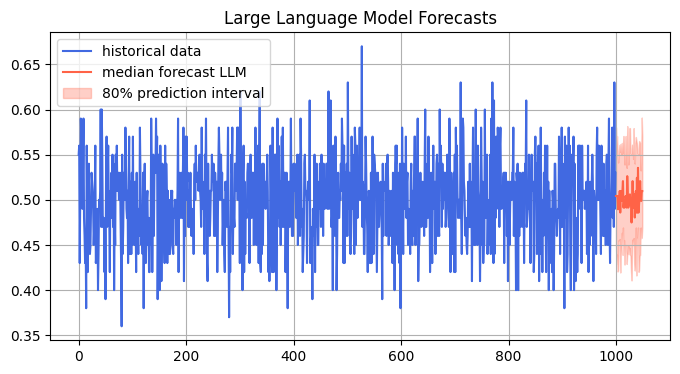

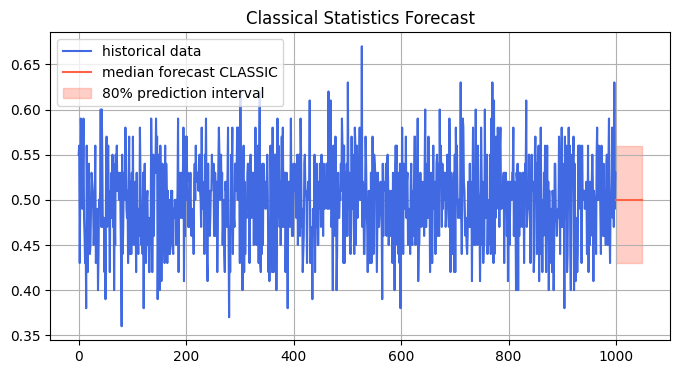

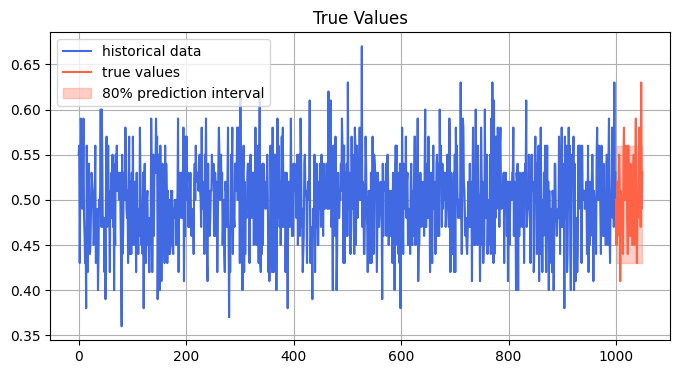

<ipython-input-7-eab503e209be>:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


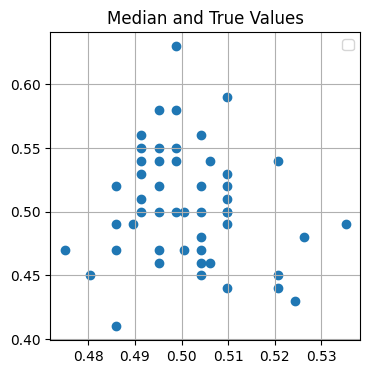

In [7]:
import matplotlib.pyplot as plt  # requires: pip install matplotlib

forecast_index = range(len(df), len(df) + 50)
low, median, high = quantiles[0, :, 0], quantiles[0, :, 1], quantiles[0, :, 2]

truefut=df['flip'].iloc[950:]

plt.figure(figsize=(8, 4))
plt.plot(df["flip"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast LLM")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.title("Large Language Model Forecasts")
plt.show()


plt.figure(figsize=(8, 4))
plt.plot(df["flip"], color="royalblue", label="historical data")
plt.plot(forecast_index, dfiftieth_percentile, color="tomato", label="median forecast CLASSIC")
plt.fill_between(forecast_index, dftenth_percentile["tenth"], dfninetieth_percentile["ninetieth"], color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.title("Classical Statistics Forecast")
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(df["flip"], color="royalblue", label="historical data")
plt.plot(forecast_index, truefut, color="tomato", label="true values")
plt.fill_between(forecast_index, dftenth_percentile["tenth"], dfninetieth_percentile["ninetieth"], color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.title("True Values")
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(median, truefut)
plt.legend()
plt.grid()
plt.title("Median and True Values")
plt.show()

Now, create a series of 0, 1 Bernoulli results and offer this to the LLM to see what happens if the purpose is forecasting results, as opposed to frequencies.

